# Statistical Analysis of IN Interictal and Preictal Firing Correlations

## Purpose

This analysis will attempt to answer the question: are the neurons (specifically the interneurons) that fire frequently during the interictal period the same interneurons that are firing more frequently during the pre-ictal period? In other words, does the interictal firing rate of a neuron correlate with its preictal firing rate?

## Hypothesis

Null: The correlation between the interictal and preictal firing rates of interneurons will be the same as the correlation between the firing rates of two interictal samples.

Alternative: The correlation between the interictal and preictal firing rates of interneurons will be less than the correlation between the firing rates of two interictal samples.

## Analysis Plan

1. Calculate Spearman Rank Order Correlation Coefficient with its associated p-value for each dataset
2. Calcualte Bonferroni correction for multiple comparisons

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pickle
import pandas as pd
import math

In [127]:
### Import firing rate data from qnc_scn1a_seizure_data_viz

scn1a_3011_mean_inter_frs = pickle.load(open('scn1a_3011_mean_inter_frs','rb'))
scn1a_3011_mean_pre_frs = pickle.load(open('scn1a_3011_mean_pre_frs','rb'))
scn1a_3007_mean_inter_frs = pickle.load(open('scn1a_3007_mean_inter_frs','rb'))
scn1a_3007_mean_pre_frs = pickle.load(open('scn1a_3007_mean_pre_frs','rb'))
WT_3009_mean_inter_frs = pickle.load(open('WT_3009_mean_inter_frs','rb'))
WT_3009_mean_pre_frs = pickle.load(open('WT_3009_mean_pre_frs','rb'))
WT_3068_mean_inter_frs = pickle.load(open('WT_3068_mean_inter_frs','rb'))
WT_3068_mean_pre_frs = pickle.load(open('WT_3068_mean_pre_frs','rb'))

scn1a_3011_IN_mean_inter_frs = pickle.load(open('scn1a_3011_IN_mean_inter_frs','rb'))
scn1a_3011_IN_mean_pre_frs = pickle.load(open('scn1a_3011_IN_mean_pre_frs','rb'))
scn1a_3007_IN_mean_inter_frs = pickle.load(open('scn1a_3007_IN_mean_inter_frs','rb'))
scn1a_3007_IN_mean_pre_frs = pickle.load(open('scn1a_3007_IN_mean_pre_frs','rb'))
WT_3009_IN_mean_inter_frs = pickle.load(open('WT_3009_IN_mean_inter_frs','rb'))
WT_3009_IN_mean_pre_frs = pickle.load(open('WT_3009_IN_mean_pre_frs','rb'))
WT_3068_IN_mean_inter_frs = pickle.load(open('WT_3068_IN_mean_inter_frs','rb'))
WT_3068_IN_mean_pre_frs = pickle.load(open('WT_3068_IN_mean_pre_frs','rb'))

scn1a_3011_mean_inter2_frs = pickle.load(open('scn1a_3011_mean_inter2_frs','rb'))
scn1a_3007_mean_inter2_frs = pickle.load(open('scn1a_3007_mean_inter2_frs','rb'))
WT_3009_mean_inter2_frs = pickle.load(open('WT_3009_mean_inter2_frs','rb'))
WT_3068_mean_inter2_frs = pickle.load(open('WT_3068_mean_inter2_frs','rb'))

scn1a_3011_IN_mean_inter2_frs = pickle.load(open('scn1a_3011_IN_mean_inter2_frs','rb'))
scn1a_3007_IN_mean_inter2_frs = pickle.load(open('scn1a_3007_IN_mean_inter2_frs','rb'))
WT_3009_IN_mean_inter2_frs = pickle.load(open('WT_3009_IN_mean_inter2_frs','rb'))
WT_3068_IN_mean_inter2_frs = pickle.load(open('WT_3068_IN_mean_inter2_frs','rb'))

Data has been pooled for statistical analysis:

n = 2 mice, each with ~200 neurons, ~40 interneurons

In [128]:
### Pool data for statistical analysis

#frs = [scn1a_3011_mean_inter_frs, scn1a_3011_mean_pre_frs, scn1a_3007_mean_inter_frs, scn1a_3007_mean_pre_frs, WT_3009_mean_inter_frs, WT_3009_mean_pre_frs, WT_3068_mean_inter_frs, WT_3068_mean_pre_frs]
#mouse = ['scn1a_3011','scn1a_3011','scn1a_3007','scn1a_3007','WT_3009','WT_3009','WT_3068','WT_3068']
#period = ['inter','pre','inter','pre','inter','pre','inter','pre']
#d = {'mouse':mouse, 'period':period, 'mean_frs':frs}
#frs_df = pd.DataFrame(data=d)
#frs_df = frs_df.convert_dtypes()

scn1a_inter_frs = np.concatenate((scn1a_3011_mean_inter_frs, scn1a_3007_mean_inter_frs))
scn1a_pre_frs = np.concatenate((scn1a_3011_mean_pre_frs, scn1a_3007_mean_pre_frs))
WT_inter_frs = np.concatenate((WT_3009_mean_inter_frs, WT_3068_mean_inter_frs))
WT_pre_frs = np.concatenate((WT_3009_mean_pre_frs, WT_3068_mean_pre_frs))

scn1a_inter2_frs = np.concatenate((scn1a_3011_mean_inter2_frs, scn1a_3007_mean_inter2_frs))
WT_inter2_frs = np.concatenate((WT_3009_mean_inter2_frs, WT_3068_mean_inter2_frs))

scn1a_IN_inter_frs = np.concatenate((scn1a_3011_IN_mean_inter_frs, scn1a_3007_IN_mean_inter_frs))
scn1a_IN_pre_frs = np.concatenate((scn1a_3011_IN_mean_pre_frs, scn1a_3007_IN_mean_pre_frs))
WT_IN_inter_frs = np.concatenate((WT_3009_IN_mean_inter_frs, WT_3068_IN_mean_inter_frs))
WT_IN_pre_frs = np.concatenate((WT_3009_IN_mean_pre_frs, WT_3068_IN_mean_pre_frs))

scn1a_IN_inter2_frs = np.concatenate((scn1a_3011_IN_mean_inter2_frs, scn1a_3007_IN_mean_inter2_frs))
WT_IN_inter2_frs = np.concatenate((WT_3009_IN_mean_inter2_frs, WT_3068_IN_mean_inter2_frs))


## Mann-Whitney U Test

1. Test for difference between the means for inter-ictal and pre-ictal firing for each genotype
2. Test for differences in inter-ictal firing between genotypes
3. Test for differences in pre-ictal firing between genotypes

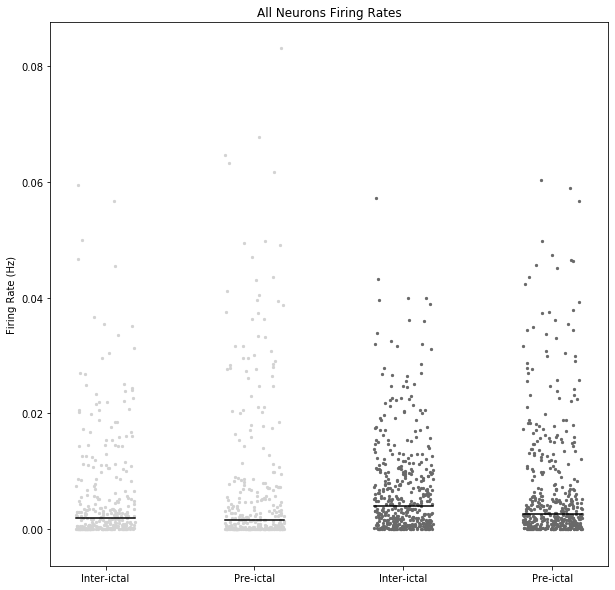

<Figure size 720x720 with 0 Axes>

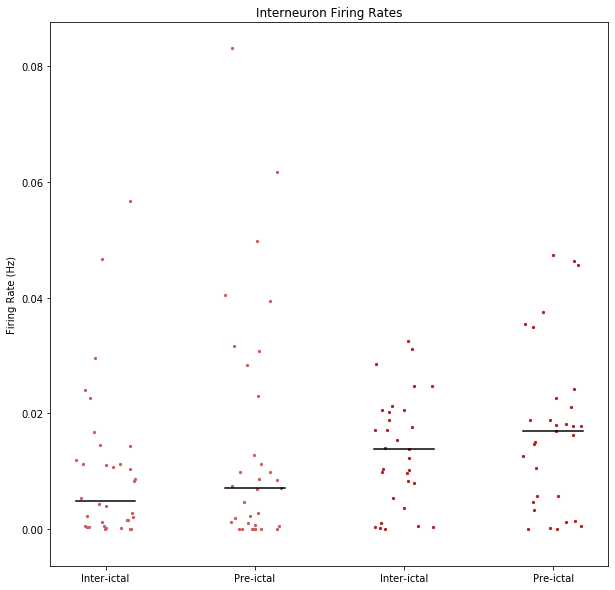

Mann-Whitney U Test (two-sided): Scn1a Inter and Pre-ictal Periods
u Stat: 98314.0
p value: 0.04722799688241219
Median: Inter 0.003933333333333334 , Pre 0.002666666666666667

Mann-Whitney U Test (two-sided): WT Inter and Pre-ictal Periods
u Stat: 46477.0
p value: 0.7892481546443044
Median: Inter 0.002 , Pre 0.0016666666666666668

Mann-Whitney U Test (two-sided): WT and Scn1a Inter-ictal Periods
u Stat: 51645.0
p value: 3.2938812645623144e-06
Median: WT Inter 0.002 , Scn1a Inter 0.003933333333333334

Mann-Whitney U Test (two-sided): WT and Scn1a Pre-ictal Periods
u Stat: 55883.5
p value: 0.0016666217236791972
Median: WT Pre 0.0016666666666666668 , Scn1a Pre 0.002666666666666667

Mann-Whitney U Test (two-sided): WT Interneuron Inter and Pre-ictal Periods
u Stat: 578.5
p value: 0.9950962421745535
Median: WT Pre 0.0048000000000000004 , Scn1a Pre 0.007033333333333333

Mann-Whitney U Test (two-sided): Scn1a Interneuron Inter and Pre-ictal Periods
u Stat: 424.0
p value: 0.4262996975649843
Med

In [147]:
### Mann-Whitney U Test

plt.rcParams['figure.figsize'] = 10,10

data = [WT_inter_frs,WT_pre_frs,scn1a_inter_frs,scn1a_pre_frs]
labels = ['Inter-ictal','Pre-ictal','Inter-ictal','Pre-ictal']
colors = ["lightgrey",'lightgrey', "dimgrey",'dimgrey']

width=0.4
fig, ax = plt.subplots()
for i, l in enumerate(labels):
    x = np.ones(data[i].shape[0])*i + (np.random.rand(data[i].shape[0])*width-width/2.)
    ax.scatter(x, data[i], color=colors[i], s=5)
    median = np.median(data[i])
    ax.plot([i-width/2., i+width/2.],[median,median], color="black")

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('All Neurons Firing Rates')

plt.savefig('median_firing_all_neurons')
plt.show()

plt.clf()

data = [WT_IN_inter_frs,WT_IN_pre_frs,scn1a_IN_inter_frs,scn1a_IN_pre_frs]
labels = ['Inter-ictal','Pre-ictal','Inter-ictal','Pre-ictal']
colors = ["indianred",'indianred', "firebrick",'firebrick']

width=0.4
fig, ax = plt.subplots()
for i, l in enumerate(labels):
    x = np.ones(data[i].shape[0])*i + (np.random.rand(data[i].shape[0])*width-width/2.)
    ax.scatter(x, data[i], color=colors[i], s=5)
    median = np.median(data[i])
    ax.plot([i-width/2., i+width/2.],[median,median], color="black")

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('Interneuron Firing Rates')

plt.savefig('median_firing_interneurons')
plt.show()

stat,pval = st.mannwhitneyu(scn1a_inter_frs,scn1a_pre_frs,use_continuity=False,alternative='two-sided')
print('Mann-Whitney U Test (two-sided): Scn1a Inter and Pre-ictal Periods')
print('============================================================')
print('u Stat:',stat)
print('p value:', pval)
print('Median:','Inter',np.median(scn1a_inter_frs),', Pre',np.median(scn1a_pre_frs))
print()

stat,pval = st.mannwhitneyu(WT_inter_frs,WT_pre_frs,use_continuity=False,alternative='two-sided')
print('Mann-Whitney U Test (two-sided): WT Inter and Pre-ictal Periods')
print('============================================================')
print('u Stat:',stat)
print('p value:', pval)
print('Median:','Inter',np.median(WT_inter_frs),', Pre',np.median(WT_pre_frs))
print()

stat,pval = st.mannwhitneyu(WT_inter_frs,scn1a_inter_frs,use_continuity=False,alternative='two-sided')
print('Mann-Whitney U Test (two-sided): WT and Scn1a Inter-ictal Periods')
print('============================================================')
print('u Stat:',stat)
print('p value:', pval)
print('Median:','WT Inter',np.median(WT_inter_frs),', Scn1a Inter',np.median(scn1a_inter_frs))
print()

stat,pval = st.mannwhitneyu(WT_pre_frs,scn1a_pre_frs,use_continuity=False,alternative='two-sided')
print('Mann-Whitney U Test (two-sided): WT and Scn1a Pre-ictal Periods')
print('============================================================')
print('u Stat:',stat)
print('p value:', pval)
print('Median:','WT Pre',np.median(WT_pre_frs),', Scn1a Pre',np.median(scn1a_pre_frs))
print()

stat,pval = st.mannwhitneyu(WT_IN_inter_frs,WT_IN_pre_frs,use_continuity=False,alternative='two-sided')
print('Mann-Whitney U Test (two-sided): WT Interneuron Inter and Pre-ictal Periods')
print('============================================================')
print('u Stat:',stat)
print('p value:', pval)
print('Median:','WT Pre',np.median(WT_IN_inter_frs),', Scn1a Pre',np.median(WT_IN_pre_frs))
print()

stat,pval = st.mannwhitneyu(scn1a_IN_inter_frs,scn1a_IN_pre_frs,use_continuity=False,alternative='two-sided')
print('Mann-Whitney U Test (two-sided): Scn1a Interneuron Inter and Pre-ictal Periods')
print('============================================================')
print('u Stat:',stat)
print('p value:', pval)
print('Median:','WT Pre',np.median(scn1a_IN_inter_frs),', Scn1a Pre',np.median(scn1a_IN_pre_frs))
print()

stat,pval = st.kruskal(WT_inter_frs,WT_pre_frs,scn1a_inter_frs,scn1a_pre_frs)
print('Kruskal-Wallis: WT and Scn1a Inter and Pre-ictal Periods')
print('============================================================')
print('h Stat:',stat)
print('p value:', pval)
print()

stat,pval = st.ttest_ind(scn1a_inter_frs,scn1a_pre_frs,equal_var=True)
print('Students T Test (two-sided): Scn1a Inter and Pre-ictal Periods')
print('============================================================')
print('t Stat:',stat)
print('p value:', pval)

# Spearman Rank Correlation Coefficient

In [148]:
corr, p = st.spearmanr(scn1a_inter_frs,scn1a_pre_frs)
print('Spearman Rank Correlation: Scn1a Inter and Pre-Ictal Periods (All Neurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = scn1a_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

corr, p = st.spearmanr(scn1a_inter_frs,scn1a_inter2_frs)
print('Spearman Rank Correlation: Scn1a Inter and Inter-Ictal Periods (All Neurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = scn1a_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

corr, p = st.spearmanr(WT_inter_frs,WT_pre_frs)
print('Spearman Rank Correlation: WT Inter and Pre-Ictal Periods (All Neurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = WT_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

corr, p = st.spearmanr(WT_inter_frs,WT_inter2_frs)
print('Spearman Rank Correlation: WT Inter and Inter-Ictal Periods (All Neurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = WT_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

corr, p = st.spearmanr(scn1a_IN_inter_frs,scn1a_IN_pre_frs)
print('Spearman Rank Correlation: Scn1a Inter and Pre-Ictal Periods (Interneurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = scn1a_IN_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

corr, p = st.spearmanr(scn1a_IN_inter_frs,scn1a_IN_inter2_frs)
print('Spearman Rank Correlation: Scn1a Inter and Inter-Ictal Periods (Interneurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = scn1a_IN_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

corr, p = st.spearmanr(WT_IN_inter_frs,WT_IN_pre_frs)
print('Spearman Rank Correlation: WT Inter and Pre-Ictal Periods (Interneurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = WT_IN_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

corr, p = st.spearmanr(WT_IN_inter_frs,WT_IN_inter2_frs)
print('Spearman Rank Correlation: WT Inter and Inter-Ictal Periods (Interneurons)')
print('============================================================')
print('Correaltion:',corr)
print('p value:',p)
num = WT_IN_inter_frs.shape[0]
stderr = 1.0 / math.sqrt(num - 3)
delta = 1.96 * stderr
lower = math.tanh(math.atanh(corr) - delta)
upper = math.tanh(math.atanh(corr) + delta)
print('Lower:',lower,'Upper:', upper)
print()

Spearman Rank Correlation: Scn1a Inter and Pre-Ictal Periods (All Neurons)
Correaltion: 0.7121753315721486
p value: 2.6768456696697324e-67
Lower: 0.6620183553279735 Upper: 0.7559817769071342

Spearman Rank Correlation: Scn1a Inter and Inter-Ictal Periods (All Neurons)
Correaltion: 0.7671408957192971
p value: 5.6799136068656535e-84
Lower: 0.7250240446082024 Upper: 0.8035415654776493

Spearman Rank Correlation: WT Inter and Pre-Ictal Periods (All Neurons)
Correaltion: 0.7692916481434907
p value: 1.6220528251654311e-60
Lower: 0.7189312899367903 Upper: 0.8116175996847822

Spearman Rank Correlation: WT Inter and Inter-Ictal Periods (All Neurons)
Correaltion: 0.8332414421841947
p value: 1.9042318160260175e-79
Lower: 0.7952247836132842 Upper: 0.8647320798823975

Spearman Rank Correlation: Scn1a Inter and Pre-Ictal Periods (Interneurons)
Correaltion: 0.7295007601399632
p value: 3.2258164049373625e-06
Lower: 0.5059373263474192 Upper: 0.8612240845266149

Spearman Rank Correlation: Scn1a Inter an